# Bigskyearth - vaex - part 1
* Intro: statistics and plotting
* Getting your data in vaex

In [1]:
import vaex
import numpy as np
import pylab as plt
plt.style.use('bigfont')
%matplotlib inline

In [2]:
1+1

2

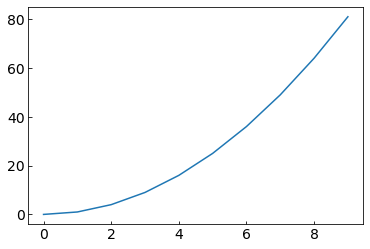

In [3]:
x = np.arange(10)
y = x**2
plt.plot(x, y)

In [4]:
#ds = vx.open("ws://gaia:9000/gaia-dr1")
#ds = vx.open("/Users/maartenbreddels/vaex/data/gaia/gaia-dr1-1percent.hdf5")
#ds = vx.open("/Users/maartenbreddels/vaex/data/nytaxi/nyc_taxi2015.hdf5")
ds = vaex.open("/Users/maartenbreddels/vaex/data/gaia/gaia-dr1-10percent.hdf5")

In [5]:
ds

column,type,unit,description,expression
solution_id,int64,,All Gaia data processed by the Data Processing and Analysis Consortium comes tagged with a solution identifier. This is a numeric field attached to each table row that can be used to unequivocally identify the version of all the subsystems that where used in the generation of the data as well as the input data used. It is mainly for internal DPAC use but is included in the published data releases to enable end users to examine the provenance of processed data products. To decode a given solution ID visit,
source_id,int64,,"A unique single numerical identifier of the source. For the contents of Gaia DR1, which does not include Solar System objects, the source ID consists consists of a 64-bit integer, least significant bit = 1 and most significant bit = 64, comprising: - a HEALPix index number (sky pixel) in bits 36 - 63; by definition the smallest HEALPix index number is zero. - a 2-bit Data Processing Centre code in bits 34 - 35; for example MOD(sourceId / 4294967296, 8) can be used to distinguish between sources initialised via the Initial Gaia Source List by the Torino DPC (code = 0) and sources otherwise detected and assigned by Gaia observations (code >0) - a 25-bit plus 7 bit sequence number within the HEALPix pixel in bits 1 - 32 split into: - a 25 bit running number in bits 8 – 32; the running numbers are defined to be positive, i.e. never zero (except in the case of forced empty windows) - a 7-bit component number in bits 1 – 7 - one spare bit in bit 33 This means that the HEALpix index level 12 of a given source is contained in the most significant bits. HEALpix index of 12 and lower levels can thus be retrieved as follows: - HEALpix level 12 = source_id / 34359738368 - HEALpix level 11 = source_id / 137438953472 - HEALpix level 10 = source_id / 549755813888 - HEALpix level n = source_id / 2 ^ 35 * 4 ^ (12 - level). Additional details can be found in the Gaia DPAC public document Source Identifiers — Assignment and Usage throughout DPAC (document code GAIA–C3–TN–ARI–BAS–020) available from",
random_index,int64,,"Random index which can be used to select smaller subsets of the data that are still representative. The column contains a random permutation of the numbers from 0 to N-1, where N is the number of rows. The random index can be useful for validation (testing on 10 different random subsets), visualization (displaying 1% of the data), and statistical exploration of the data, without the need to download all the data.",
ref_epoch,float64,,"Reference epoch to which the astrometic source parameters are referred, expressed as a Julian Year in TCB.",
ra,float64,$\mathrm{{}^{\circ}}$,Barycentric right ascension \alpha of the source in ICRS at the reference epoch refEpoch,
ra_error,float64,$\mathrm{mas}$,Standard error \sigma_{\alpha *} \equiv \sigma_\alpha\cos\delta of the right ascension of the source in ICRS at the reference epoch refEpoch.,
dec,float64,$\mathrm{{}^{\circ}}$,Barycentric declination \delta of the source in ICRS at the reference epoch refEpoch,
dec_error,float64,$\mathrm{mas}$,Standard error \sigma_\delta of the declination of the source in ICRS at the reference epoch refEpoch,
parallax,float64,$\mathrm{mas}$,Absolute barycentric stellar parallax \varpi of the soure at the reference epoch refEpoch,
parallax_error,float64,$\mathrm{mas}$,Standard error \sigma_\varpi of the stellar parallax at the reference epoch refEpoch,


In [6]:
ds.head()

#,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_good_obs_ac,astrometric_n_bad_obs_al,astrometric_n_bad_obs_ac,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,astrometric_relegation_factor,astrometric_weight_al,astrometric_weight_ac,astrometric_priors_used,matched_observations,duplicated_source,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,l,b,ecl_lon,ecl_lat,random_index_new,G
0,1635378410781933568,4653261061339201408,396435306,2015.0,70.448328159853702,3.7961224152503883,-71.695748903186569,6.0268253692814007,nan,nan,nan,nan,nan,nan,0.76905,nan,nan,nan,nan,nan,nan,nan,nan,nan,34,0,34,0,0,0,nan,0.0,0.0,70,1.0,0.014480601,nan,2,14,70,0.8886559,0.62113625,0.47295949,0.69027919,-56.079586,-61.217167,47.146622,13.297401,68,132.74638258519224,2.8342295231214747,20.217213325985874,283.89010182152231,-35.642650089141988,314.72479714975469,-81.410304906526008,453776636,20.217213325985874
1,1635378410781933568,3183005794984278400,1064282856,2015.0,74.410435017472835,1.0220038691630979,-10.098080513936283,1.705442540935193,nan,nan,nan,nan,nan,nan,-0.7281,nan,nan,nan,nan,nan,nan,nan,nan,nan,75,0,74,0,1,0,nan,1.7538019303112076,1.7725920049008217,70,1.2854626,0.073237635,nan,2,14,70,0.48485264,0.28143036,0.21096027,0.50824386,-133.36464,33.782207,-51.675213,44.965965,82,299.97140237222681,2.4251079797996584,19.332070430240847,209.11110767897409,-29.824931672583379,71.705906654981007,-32.552605733509147,1092218309,19.332070430240847
2,1635378410781933568,4107765137787303424,12665983,2015.0,258.98558929884956,6.4453302404811881,-27.882417547104072,3.6298806298255251,nan,nan,nan,nan,nan,nan,0.19715001,nan,nan,nan,nan,nan,nan,nan,nan,nan,62,0,59,0,3,0,nan,3.5347922738201571,6.735765514872269,70,13.644248,0.028884925,nan,2,7,70,0.68441468,0.48157418,0.91659826,0.81429851,-59.671658,-26.367931,-31.970381,-40.63879,57,239.1984985667996,5.4325440301394732,19.577873940622769,357.3008983141487,6.0352140807129935,260.24276152199383,-4.8154409556136368,228972814,19.577873940622769
3,1635378410781933568,6000901642821643264,1110605237,2015.0,229.90791073074064,0.76535752248689992,-42.875560016594086,0.37139504470037371,nan,nan,nan,nan,nan,nan,0.61825001,nan,nan,nan,nan,nan,nan,nan,nan,nan,123,0,122,0,1,0,nan,0.0,0.0,70,1.0,0.32922804,nan,2,17,70,0.36761984,0.56412446,0.28794056,0.51157725,-8.0175171,-10.897376,-30.979944,-34.078159,138,496.13256193779898,2.0590843519806135,18.785775735386174,329.77982184516713,12.139534343431455,238.98533766350926,-23.65689127625858,137329428,18.785775735386174
4,1635378410781933568,5991839674144353536,1079211503,2015.0,241.59865695221831,0.53098435671902211,-43.422118029724459,0.29834024425635697,nan,nan,nan,nan,nan,nan,0.76709998,nan,nan,nan,nan,nan,nan,nan,nan,nan,315,0,315,0,0,0,nan,0.70607991006067838,4.8325400359917579,70,1.1904035,0.53842324,nan,2,44,70,0.61065269,0.8347156,0.57394743,0.52250642,-0.81963819,-3.9656355,0.86793053,-2.0025661,338,998.02678290081451,1.859754193535853,18.026914573573116,336.26389136194194,6.4807110333809845,248.10500341825389,-22.117822943008886,1104491361,18.026914573573116
5,1635378410781933568,2197977757437967744,455520132,2015.0,331.30926719126802,0.99194308856788016,55.76417512410498,1.1849859537856224,nan,nan,nan,nan,nan,nan,0.82620001,nan,nan,nan,nan,nan,nan,nan,nan,nan,158,0,158,0,0,0,nan,2.4566655730882694,6.6083453891993509,70,2.6011174,0.062909283,nan,2,24,70,0.55932111,0.69177622,0.7671

In [7]:
ds.head_and_tail()

In [8]:
"{:,}".format(len(ds))

'114,267,977'

In [9]:
ds.count("parallax")

205582.0

In [10]:
%%timeit -r3 -n1 -o
ds.count("parallax")

1 loop, best of 3: 102 ms per loop


<TimeitResult : 1 loop, best of 3: 102 ms per loop>

In [11]:
len(ds)/_.best/10**9 # _ refers to the output of the last cell, this case it is the output of timeit

1.1231243662964656

In [12]:
ds.count(selection="parallax < 0")

<string>:1: RuntimeWarning: invalid value encountered in less


3046.0

In [13]:
ds.count("b") # 0d

114267977.0

In [14]:
ds.count() # 0d

114267977.0

In [15]:
counts_b = ds.count(binby="b", limits=[-90, 90], shape=64) # 1d
print(counts_b, counts_b.shape)

[  6.74000000e+03   1.68250000e+04   2.90330000e+04   4.01270000e+04
   5.21660000e+04   6.41590000e+04   7.54190000e+04   8.78130000e+04
   1.05629000e+05   1.17321000e+05   1.36628000e+05   1.56748000e+05
   1.74216000e+05   1.96930000e+05   2.32439000e+05   3.09551000e+05
   5.02005000e+05   3.76981000e+05   4.71554000e+05   9.79541000e+05
   1.25608200e+06   1.01694300e+06   1.02716100e+06   1.26092700e+06
   1.62885600e+06   2.18119900e+06   3.02895500e+06   4.50664600e+06
   7.02230400e+06   1.07281530e+07   1.38263910e+07   1.08168450e+07
   9.45059300e+06   1.10543070e+07   8.62886900e+06   6.09571900e+06
   3.98428300e+06   2.64483100e+06   1.88583100e+06   1.45901600e+06
   1.14453200e+06   9.09053000e+05   7.24858000e+05   5.89848000e+05
   4.83103000e+05   4.05318000e+05   3.52419000e+05   3.00792000e+05
   2.61930000e+05   2.25265000e+05   1.94795000e+05   1.71499000e+05
   1.52353000e+05   1.33013000e+05   1.15888000e+05   1.00457000e+05
   8.70870000e+04   7.44450000e+04

In [16]:
%%timeit -r3 -n1 -o
counts_b = ds.count(binby="b", limits=[-90, 90], shape=64)

1 loop, best of 3: 248 ms per loop


<TimeitResult : 1 loop, best of 3: 248 ms per loop>

In [17]:
len(ds)/_.best/10**9

0.4603291973375003

In [18]:
%%time
import scipy.stats
result = scipy.stats.binned_statistic(ds.data.b, ds.data.b, statistic="count", bins=64, range=[-90, 90])

CPU times: user 8.16 s, sys: 5.1 s, total: 13.3 s
Wall time: 18.7 s


In [19]:
len(ds)/19/1e9

0.006014104052631579

In [20]:
np.sum(result[0]-counts_b)

0.0

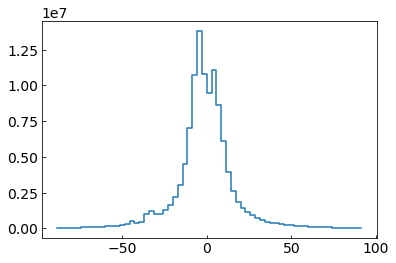

In [21]:
b = np.linspace(-90, 90, 64)
b += (b[1] - b[0])/2
plt.plot(b, counts_b, drawstyle="steps")

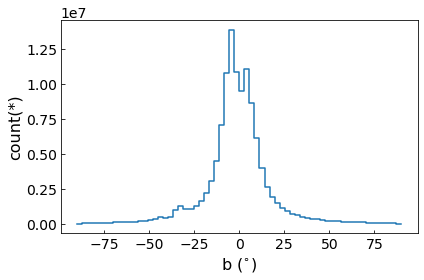

In [22]:
ds.plot1d("b", limits=[-90, 90], shape=64)

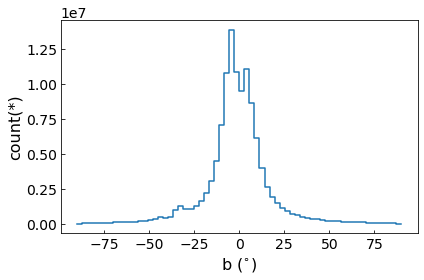

In [23]:
ds.plot1d("b", limits=[-90, 90], shape=64, grid=counts_b) # pass grid argument to reuse previous statistics

In [24]:
# all statistical methods act the same, 0d-Nd, binby=[....]
print("mean", ds.mean("b"))
print("std", ds.std("b"))
print("minmax", ds.minmax("b"))
print("correlation", ds.correlation("l", "b"))

mean -1.13087389795
std 16.8470199634
minmax [-89.99366419  89.97486851]
correlation -0.03558484534274405


In [25]:
# print("mean", ds.mean("b", selection="l < 180"))

In [26]:
# print("mean", ds.mean("b", selection=["l < 180", "l >= 180"]))

In [27]:
counts_lb = ds.count(binby=["l", "b"], limits=[[360, 0], [-90, 90]])

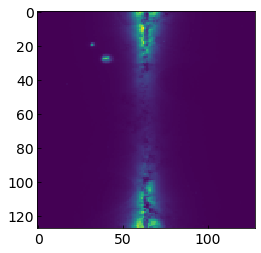

In [28]:
plt.imshow(counts_lb)

In [29]:
plt.style.use('bigfont')

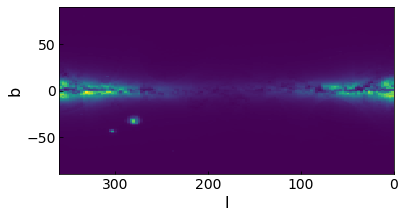

In [30]:
plt.imshow(counts_lb.T, origin='lower', extent=[360, 0, -90, 90])
plt.xlabel('l')
plt.ylabel('b')

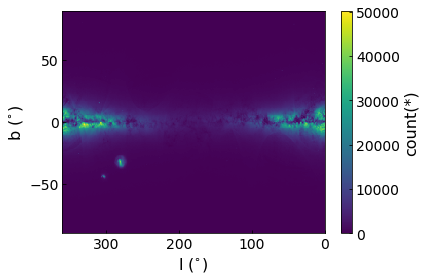

In [31]:
ds.plot("l", "b", limits=[[360, 0], [-90, 90]], colormap="viridis")

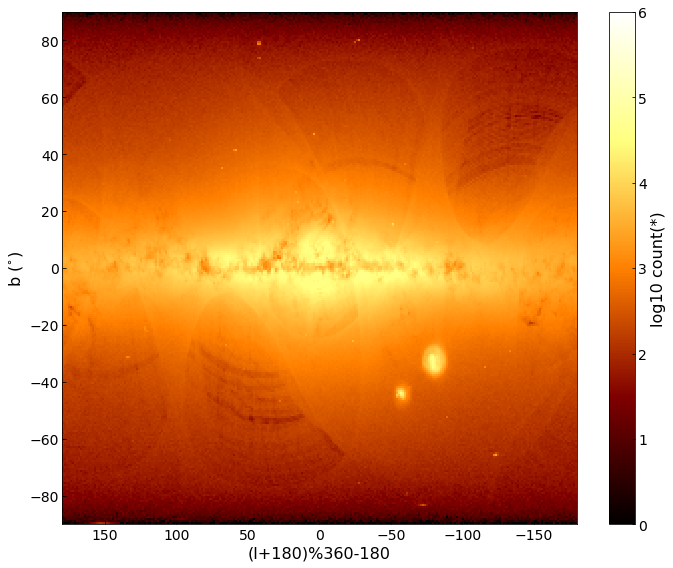

In [32]:
# vaex takes any valid 'python/numpy expression'
# increase contrast by taking of the log of counts
#  * f can be any numpy function np.log, np.log10, np.sqrt, 
ds.plot("(l+180)%360-180", "b", limits=[[180, -180], [-90, 90]], f="log10", figsize=(10,8), vmin=0, vmax=6)

In [33]:
ds.col.phot_g_mean_mag

'phot_g_mean_mag'

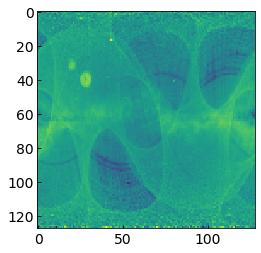

In [34]:
mean_g = ds.mean("phot_g_mean_mag", binby=["l", "b"], limits=[[360, 0], [-90, 90]])
plt.imshow(mean_g.T) # origin, extend, labels...

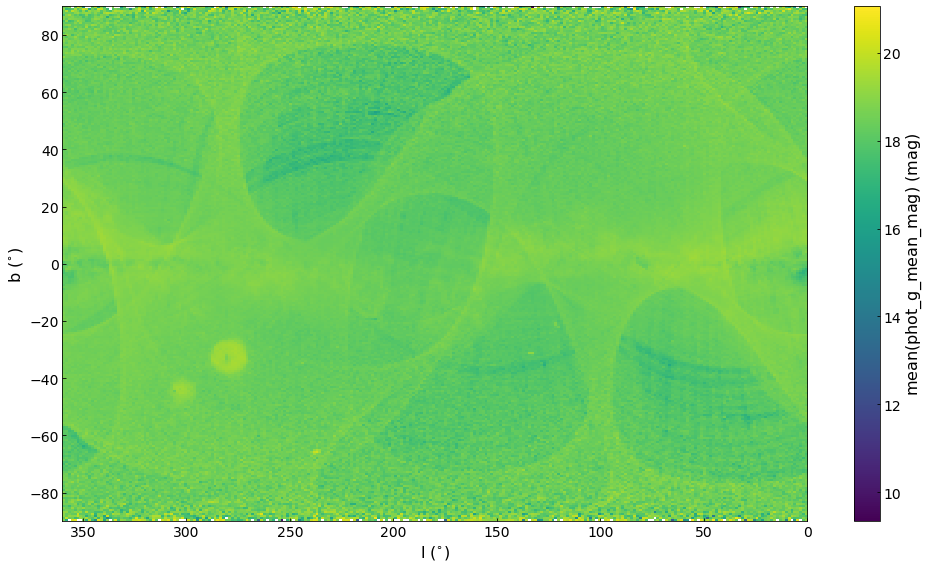

In [35]:
ds.plot("l", "b", what="mean(phot_g_mean_mag)", limits=[[360, 0], [-90, 90]], figsize=(14,8), colormap="viridis")

# plt.scatter([200, 220], [0, 10])
# plt.tight_layout()
# plt.savefig("for_paper.eps")

In [36]:
# ds.plot("l", "b",
#         what=["sum(phot_g_mean_flux)", "mean(ra_dec_corr)", "mean(astrometric_n_obs_al/matched_observations)"],
#       limits=[[360, 0], [-90, 90]], figsize=(14,5), colormap=["afmhot", "bwr", "bwr"],
#        f=["log", None, None])


# Getting your data in
 * http://vaex.astro.rug.nl/latest/getting_data_in_vaex.html

In [37]:
import numpy as np

In [38]:
N = 100000
x = np.random.normal(0, 1, N)
y = np.random.normal(0, 1, N) + 0.4 *x
x,y 

(array([ 1.20961454, -0.55733997,  0.61303664, ...,  0.7516712 ,
         0.01245076, -1.15348453]),
 array([ 0.90651638,  0.11784136,  0.29720424, ..., -0.5519323 ,
        -0.08507321, -1.06087432]))

In [39]:
ds_array = vaex.from_arrays(x=x, y=y, test=x*y)

In [40]:
ds_array

In [41]:
ds_array.data.x # access the original numpy array

array([ 1.20961454, -0.55733997,  0.61303664, ...,  0.7516712 ,
        0.01245076, -1.15348453])

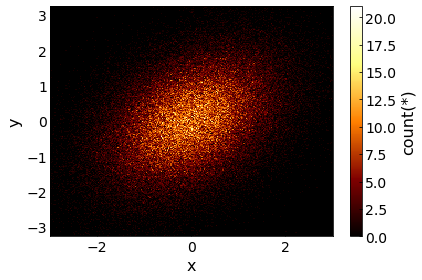

In [42]:
ds_array.plot("x", "y")

In [43]:
# df = ds_array.to_pandas_df()
# df.to_csv("example.csv")

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("example.csv", index_col='index')

In [46]:
ds_csv = vaex.from_pandas(df, copy_index=False)
# shorter:
# ds_csv = vaex.from_csv("example.csv", index_col="index")

In [47]:
ds_csv.head_and_tail()

In [48]:
df

,test,x,y
index,,,
0,2.295069,-1.205131,-1.904414
1,1.423595,-0.831146,-1.712811
2,-0.036675,-0.168224,0.218016
3,1.597947,-1.237626,-1.291139
4,-1.655849,1.745602,-0.948584
5,-1.040545,-0.633219,1.643264
6,0.307889,0.755204,0.407690
7,0.302060,-0.798744,-0.378168
8,3.299656,1.737135,1.899482


In [49]:
# multiple files:
ds_concat = ds_csv.concat(ds_array)

In [50]:
len(ds_concat), len(ds_csv), len(ds_array)

(200000, 100000, 100000)

In [51]:
# Now you probably want to save it to hdf5 for better read performance
ds_concat.export_hdf5('faster.hdf5')

In [52]:
ds_faster = vaex.open('faster.hdf5')

In [53]:
import astropy.io.ascii

In [54]:
tab = astropy.io.ascii.read("example.csv")

In [55]:
tab

index,test,x,y
int64,float64,float64,float64
0,2.29506867056,-1.2051309519,-1.90441434348
1,1.4235949718,-0.831145550189,-1.71281067615
2,-0.0366754327384,-0.168223961532,0.218015509826
3,1.59794749297,-1.23762582842,-1.29113941894
4,-1.65584932394,1.74560158637,-0.948583764399
5,-1.04054541523,-0.633218759299,1.64326372197
6,0.307889430016,0.755204433414,0.407690178174
7,0.302059553393,-0.798744369415,-0.378167990861
8,3.29965584016,1.73713454185,1.89948202667


In [56]:
ds_tab = vaex.from_astropy_table(tab)

In [57]:
ds_tab.head()

#,index,test,x,y
0,0,2.2950686705567538,-1.2051309518958031,-1.904414343475586
1,1,1.4235949717981036,-0.83114555018931391,-1.7128106761491351
2,2,-0.036675432738364565,-0.16822396153198124,0.21801550982612045
3,3,1.5979474929742743,-1.2376258284245365,-1.2911394189376424
4,4,-1.6558493239427403,1.7456015863740801,-0.94858376439851266
5,5,-1.0405454152296467,-0.63321875929899085,1.6432637219743611
6,6,0.30788943001640584,0.75520443341378007,0.40769017817419478
7,7,0.30205955339298263,-0.79874436941526916,-0.37816799086059177
8,8,3.2996558401582496,1.7371345418516722,1.8994820266719419
9,9,0.063884842292151356,0.096968861060911626,0.65881811535376988
